<img src='https://seaborn.pydata.org/_static/logo-wide-lightbg.svg' width=500/>

# 07과 seaborn 다양한 차트들

## 1. 환경준비

* 라이브러리 불러오기

In [ ]:
# anaconda 를 설치하게 되면, 다양한 패키지들이 함께 설치 됩니다.
# 그러나 이후에 패키지 업데이트를 위해서는 아래와 같은 작업이 필요합니다.

!pip install -U seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 아이리스 꽃 분류  
③ 보스톤 시, 타운별 집값   
④ 뉴욕 공기오염도 조사

In [3]:
# 타이타닉 데이터
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://bit.ly/3JiY7ZZ')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [6]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://bit.ly/3qmthqZ')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


## 2. seaborn 다양한 차트들

### 1) 기본 차트들

* histogram : sns.histplot


https://seaborn.pydata.org/generated/seaborn.histplot.html

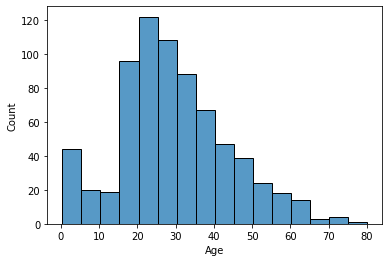

In [7]:
sns.histplot(data = titanic, x='Age', bins = 16)
plt.show()

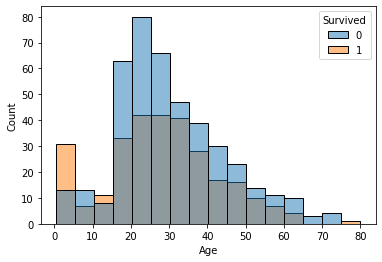

In [8]:
sns.histplot(data = titanic, x='Age', bins = 16, hue = 'Survived')
plt.show()

* densityplot : sns.kdeplot

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

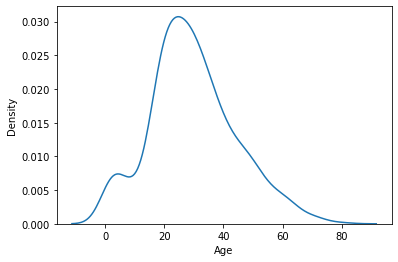

In [9]:
sns.kdeplot(data = titanic, x = 'Age')
plt.show()

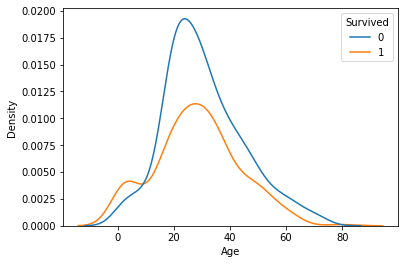

In [10]:
sns.kdeplot(data = titanic, x = 'Age', hue = 'Survived')
plt.show()

* boxplot

https://seaborn.pydata.org/generated/seaborn.boxplot.html

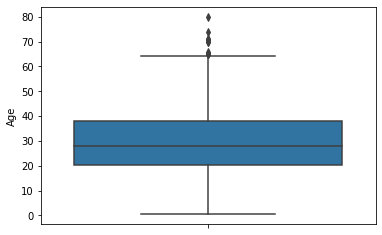

In [11]:
sns.boxplot(data = titanic, y = 'Age')
plt.show()

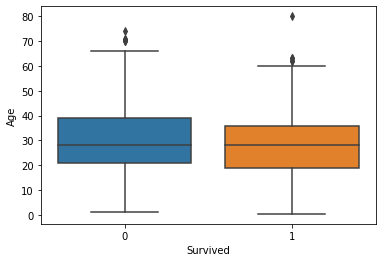

In [12]:
sns.boxplot(data = titanic, y = 'Age', x = 'Survived')
plt.show()

#### 연습

* titanic의 Fare에 대해서, Pclass 별로 비교하는 차트를 그려봅시다.
    * histplot()
    * kdeplot()
    * boxplot()

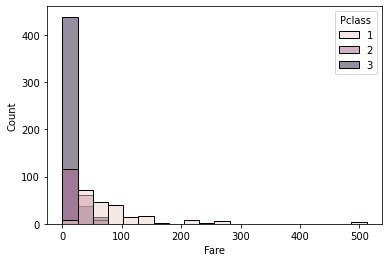

In [23]:
# histplot
sns.histplot(data=titanic, x='Fare', bins =20, hue = 'Pclass')
#sns.histplot(data=titanic, x='Fare', bins =20, hue = 'Embarked')
plt.show()

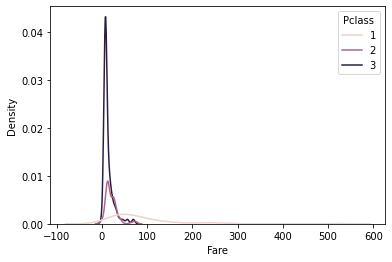

In [20]:
# kdeplot
sns.kdeplot(data=titanic,x='Fare',hue='Pclass')
plt.show()

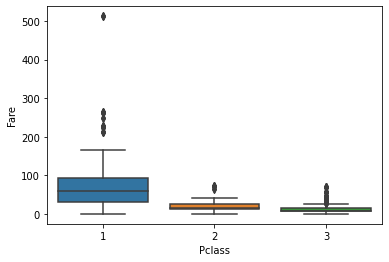

In [21]:
# boxplot
sns.boxplot(data=titanic, y='Fare', x='Pclass')
plt.show()

### 2) distplot : histogram + density plot

https://seaborn.pydata.org/generated/seaborn.distplot.html

* hist_kws = dict() : 히스토그램을 꾸미기 위한 옵션, 딕셔너리 형태로 입력.
* 히스토그램과 밀도함수 그래프를 겹쳐서 표현



C:\Users\myblo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


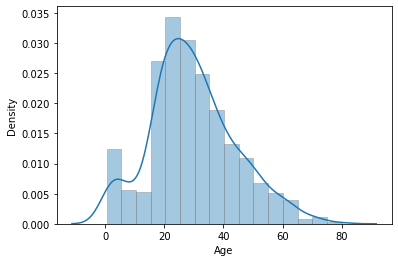

In [24]:
sns.distplot(titanic['Age'], bins = 16, hist_kws = dict(edgecolor='grey'))
plt.show()

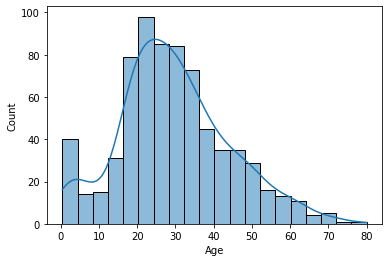

In [27]:
# 앞으로는 이 코드 사용
sns.histplot(titanic['Age'], bins = 20, kde=True)
plt.show()

###  3) jointplot : scatter + histogram(혹은 density plot)

https://seaborn.pydata.org/generated/seaborn.jointplot.html

* 두 숫자형 변수의 분포를 한꺼번에 비교하여 보여줍니다.
* Seaborn 그래프의 가장 큰 특징은 hue 옵션으로 범주 차원을 추가해서 볼 수 있습니다.


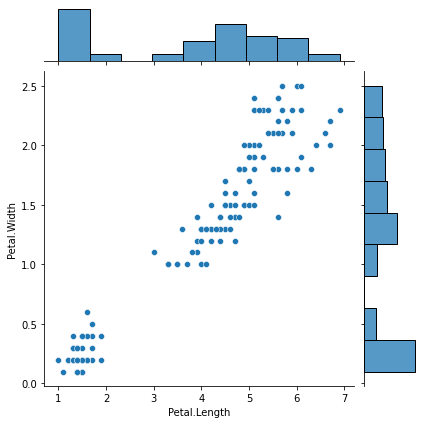

In [26]:
sns.jointplot(x='Petal.Length', y='Petal.Width', data = iris)
plt.show()

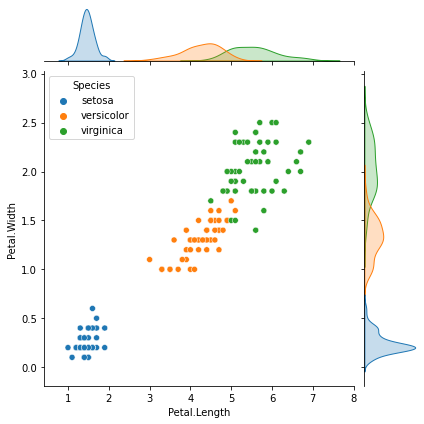

In [28]:
sns.jointplot(x='Petal.Length', y='Petal.Width', data = iris, hue = 'Species')
plt.show()

### 4) pairplot : scatter + histogram(혹은 density plot) 확장

https://seaborn.pydata.org/generated/seaborn.pairplot.html


* 모든 숫자형 변수들에 대해서 서로 비교하는 산점도 표시
* 각 변수에 대해서는 히스토그램(혹은 density plot) 표시
* 단점 : 시간이 오래 걸린다!



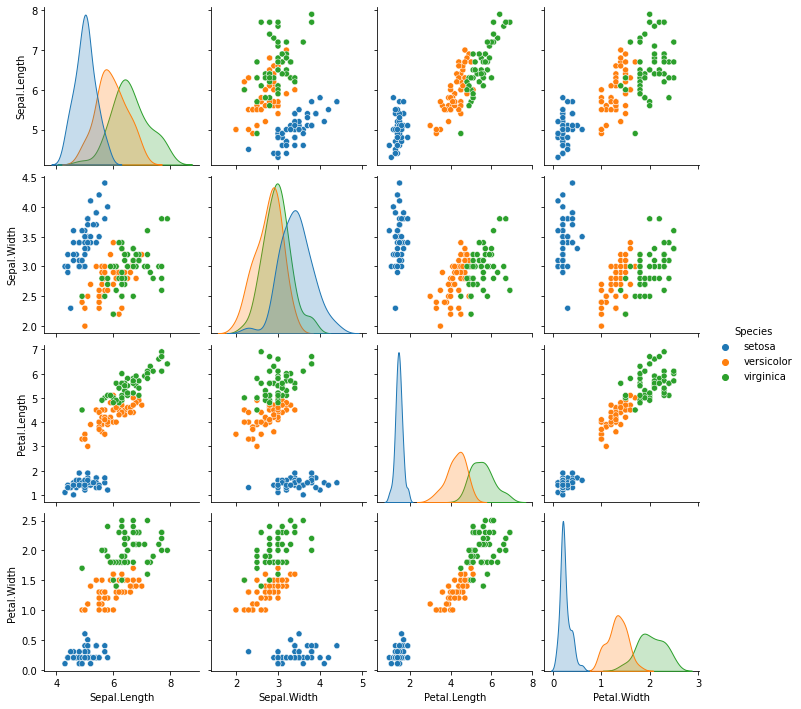

In [30]:
sns.pairplot(iris, hue = 'Species')
plt.show()

### 5) countplot : 집계 + bar plot

https://seaborn.pydata.org/generated/seaborn.countplot.html

* Matplotlib에서는 bar plot을 그릴때, 반드시 집계가 선행되어야 합니다.
* 그러나 seaborn.countplot 은 집계를 포함하여 barplot을 그려줍니다.


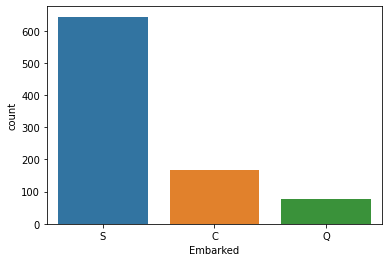

In [31]:
sns.countplot(x="Embarked", data=titanic)
plt.show()

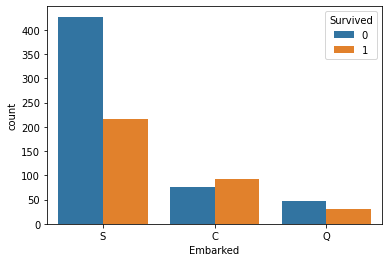

In [32]:
sns.countplot(x="Embarked", data=titanic, hue = 'Survived')
plt.show()

### 6) barplot : 평균비교 bar plot + error bar

https://seaborn.pydata.org/generated/seaborn.barplot.html

* seaborn.barplot 은 일반적인 barplot이 아닙니다.
* 범주별(x), 숫자(y)의 평균을 비교하는 그래프 입니다.(중요!)
* 가운데 직선은, 신뢰구간을 의미합니다.


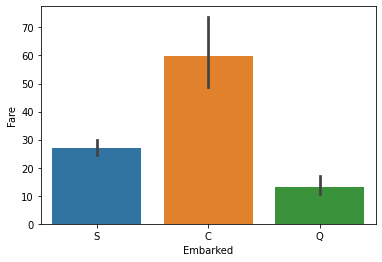

In [33]:
sns.barplot(x="Embarked", y="Fare", data = titanic)
plt.show()

### 7) heatmap : 두 범주 집계 시각화

https://seaborn.pydata.org/generated/seaborn.heatmap.html

* 두 범주를 집계한 결과를 색의 농도로 표현해주는 그래프입니다.
* 집계(groupby)와 피봇(pivot)을 먼저 만들어 줘야 합니다.
* 여러 범주를 갖는 변수 비교 시 유용합니다.


In [35]:
temp1 = titanic.groupby(['Embarked','Pclass'], as_index = False)['PassengerId'].count()
temp1

,Embarked,Pclass,PassengerId
0,C,1,85
1,C,2,17
2,C,3,66
3,Q,1,2
4,Q,2,3
5,Q,3,72
6,S,1,127
7,S,2,164
8,S,3,353


In [36]:
temp2 = temp1.pivot('Embarked','Pclass', 'PassengerId')
temp2

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


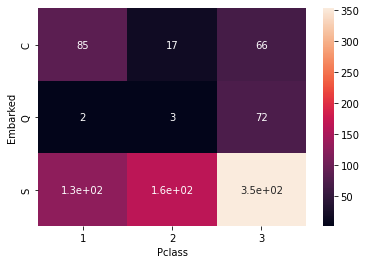

In [38]:
temp1 = titanic.groupby(['Embarked','Pclass'], as_index = False)['PassengerId'].count()
temp2 = temp1.pivot('Embarked','Pclass', 'PassengerId')
print(temp2)

sns.heatmap(temp2, annot = True)
plt.show()

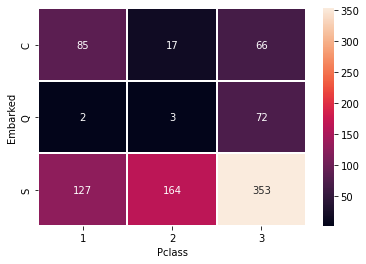

In [39]:
# 값을 정수로, 구간 간격을 살짝 벌려서 그리자.
sns.heatmap(temp2, annot = True, fmt = 'd', linewidth = .2)
plt.show()

* 추가 : pivot
    * pivot 함수를 이용하여 집계된 데이터를 재구성할 수 있습니다.
    * 문법 : dataframe.pivot(index, colums, values)


<img src='https://github.com/DA4BAM/image/blob/main/pivot.png?raw=true' width=600/>

In [42]:
# zn2별, chas별, 평균 medv

temp1 = boston.groupby(['zn2', 'chas'], as_index = False)['medv'].mean()
temp1.pivot('zn2', 'chas', 'medv')

chas,0,1
zn2,,
0,19.974709,26.600000
1,27.215663,33.433333
2,29.000000,50.000000


# 종합실습

## 1. 환경준비

* 라이브러리 불러오기

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 아이리스 꽃 분류  
③ 보스톤 시, 타운별 집값   
④ 뉴욕 공기오염도 조사  
⑤ 코스피지수

In [41]:
# 타이타닉 데이터
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://bit.ly/3JiY7ZZ')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [36]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://bit.ly/3qmthqZ')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


In [37]:
# 코스피 지수
stock = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/KOSPI.csv')
stock['Date'] = pd.to_datetime(stock['Date'])
stock['Year'] = stock.Date.dt.year
stock['Month'] = stock.Date.dt.month
stock['Weekday'] = stock.Date.dt.weekday
stock.head()

,Date,Open,High,Low,Close,Volume,DataSplit,Year,Month,Weekday
0,2014-09-30,2023.18,2029.17,2007.30,2020.09,322812,0,2014,9,1
1,2014-10-01,2013.47,2013.47,1989.84,1991.54,351581,0,2014,10,2
2,2014-10-02,1984.43,1985.06,1966.17,1976.16,322656,0,2014,10,3
3,2014-10-06,1987.89,1988.39,1968.30,1968.39,325078,0,2014,10,0
4,2014-10-07,1979.83,1982.96,1966.22,1972.91,328234,0,2014,10,1


## 2. seaborn 다양한 차트들

### 1) 기본 차트들

① iris의 Petal.Length 에 대해서, Species 별로 비교하는 차트를 그려봅시다.
    * histplot()
    * kdeplot()
    * boxplot()

* histogram : sns.histplot

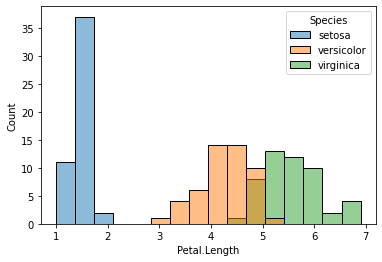

In [ ]:
sns.histplot(data = iris, x='Petal.Length', bins = 16, hue = 'Species')
plt.show()

* densityplot : sns.kdeplot

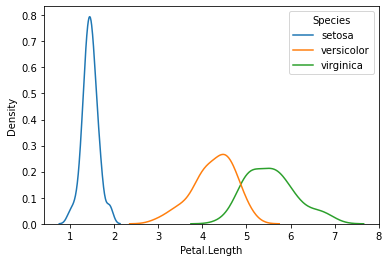

In [ ]:
sns.kdeplot(data = iris, x='Petal.Length', hue = 'Species')
plt.show()

* boxplot

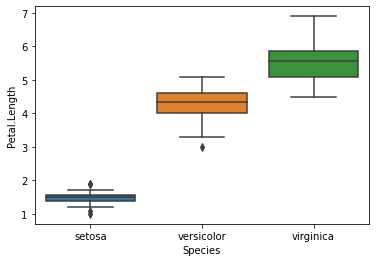

In [ ]:
sns.boxplot(data = iris, y = 'Petal.Length', x = 'Species')
plt.show()

### 2) distplot : histogram + density plot

① titanic['Fare'] 에 대해서 distplot을 그려 봅시다.
* bin의 개수를 10 ~ 50 사이에서 조절해 봅시다.
* 히스토그램을 꾸며 봅시다. hist_kws = {'edgecolor':'grey'}


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


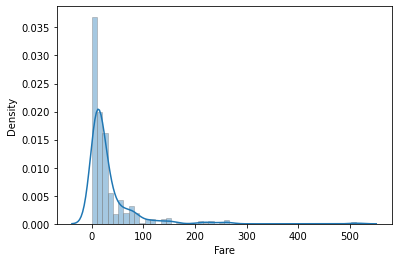

In [ ]:
sns.distplot(titanic['Fare'], bins = 50, hist_kws = {'edgecolor':'grey'})
plt.show()

② boston['medv'] 에 대해서 distplot을 그려 봅시다.

* bin의 개수를 10 ~ 50 사이에서 조절해 봅시다.
* 히스토그램을 꾸며 봅시다. hist_kws = {'edgecolor':'grey'}

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


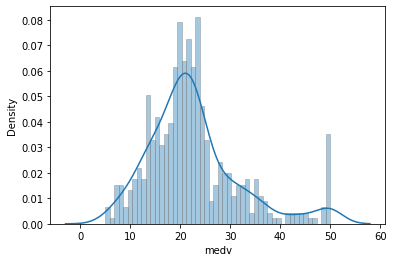

In [ ]:
sns.distplot(boston['medv'], bins = 50, hist_kws = {'edgecolor':'grey'})
plt.show()

###  3) jointplot : scatter + histogram(혹은 density plot)

① titanin['Age']와 titanic['Fare']에 대해 join plot을 그려봅시다.

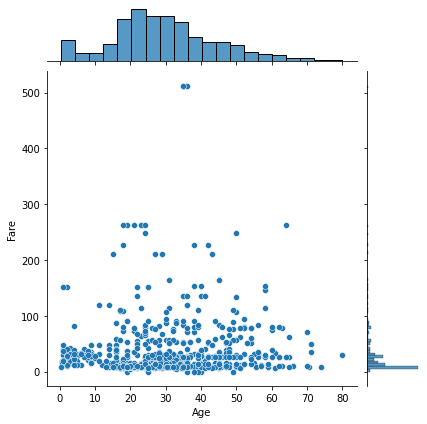

In [ ]:
sns.jointplot(x='Age', y='Fare', data = titanic)
plt.show()

② titanin['Age']와 titanic['Fare']에 대해 join plot을 그려봅시다. 단, 생존여부(Survived) 별로 구분.

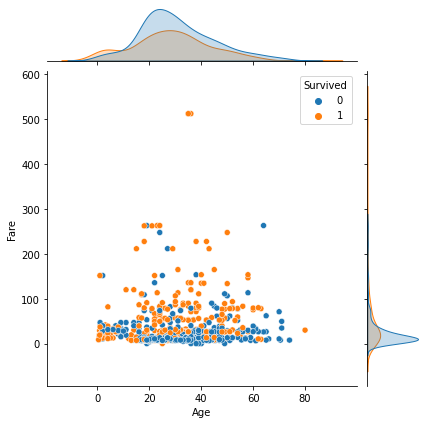

In [ ]:
sns.jointplot(x='Age', y='Fare', hue = 'Survived', data = titanic)
plt.show()

### 4) pairplot : scatter + histogram(혹은 density plot) 확장


① air 데이터셋에 대해서 pairplot을 그려 봅시다.

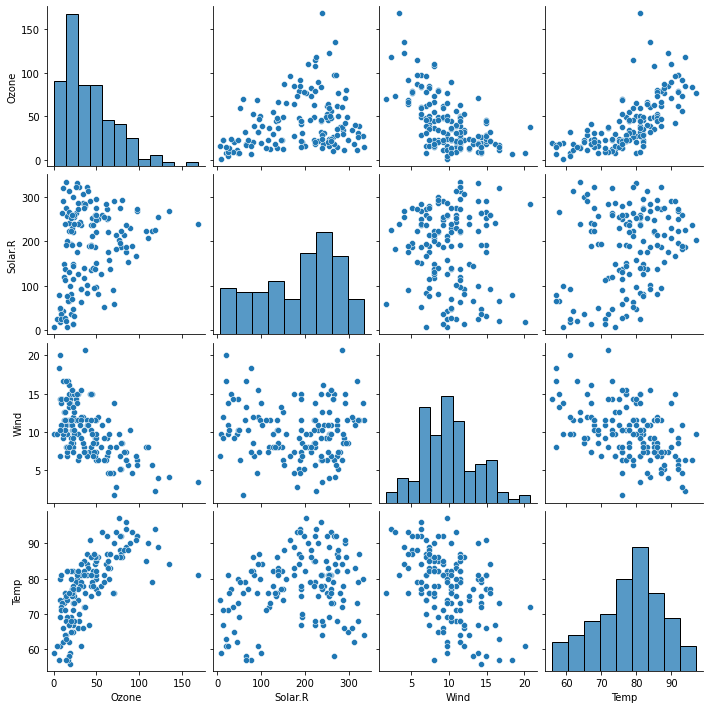

In [ ]:
sns.pairplot(air)
plt.show()

② air 데이터셋에 대해서 pairplot을 그릴 때, 월별로 구분해서)

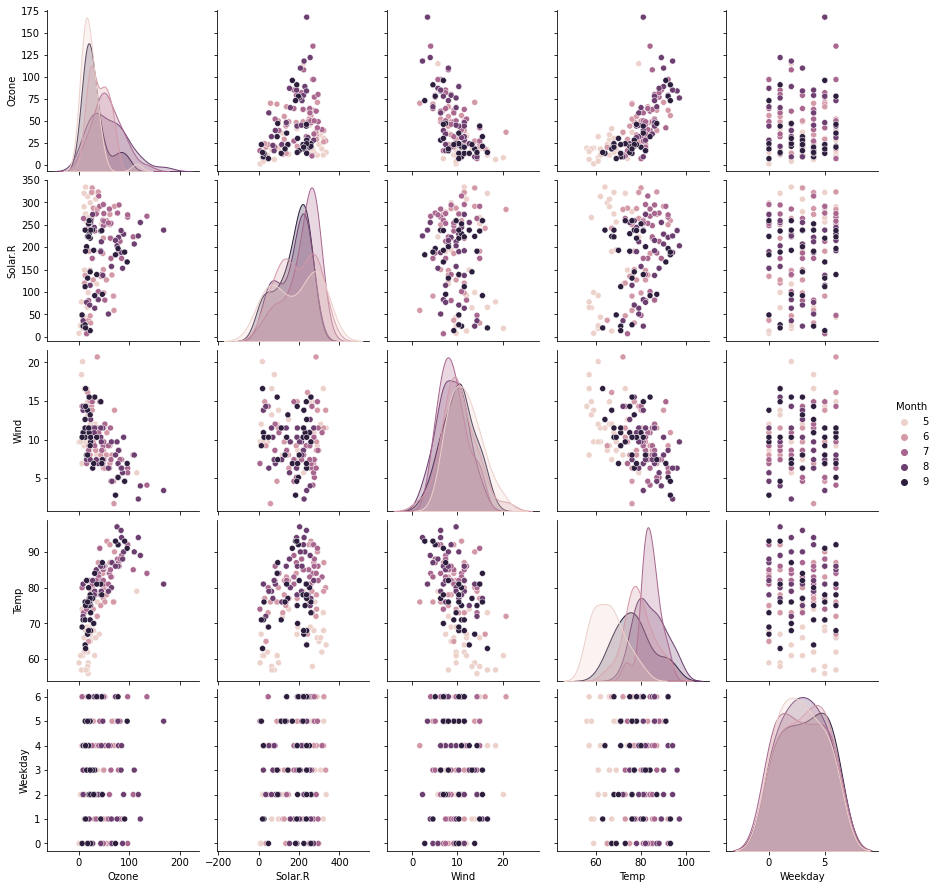

In [ ]:
sns.pairplot(air, hue = 'Month')
plt.show()

### 5) countplot : 집계 + bar plot

① boston['chas'] 에 대해 countplot을 그려 봅시다.

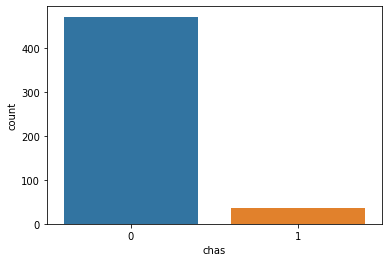

In [ ]:
sns.countplot(x="chas", data=boston)
plt.show()

② titanic['Survived']에 대해 countplot을 그려 봅시다.

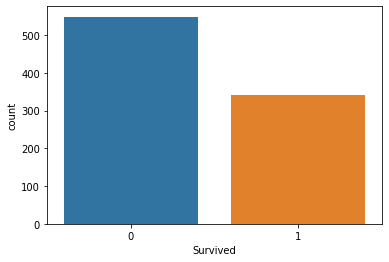

In [ ]:
sns.countplot(x="Survived", data=titanic)
plt.show()

③ titanic['Survived']에 대해 성별 별로 구분하여 countplot을 그려 봅시다.

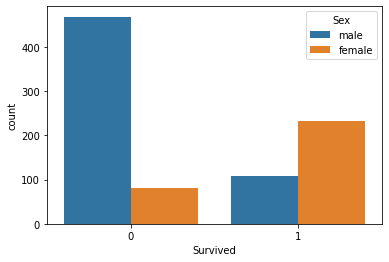

In [ ]:
sns.countplot(x="Survived", hue = 'Sex', data=titanic)
plt.show()

### 6) barplot : 평균비교 bar plot + error bar

① boston['chas'] 별 boston['medv']의 평균을 비교해 봅시다.

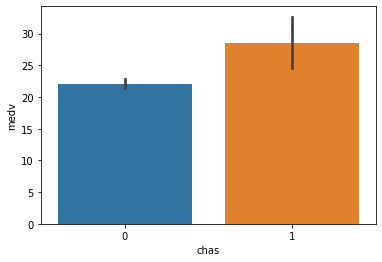

In [ ]:
sns.barplot(x="chas", y="medv", data = boston)
plt.show()

② air['Month'] 별 air['Ozone']의 평균을 비교해 봅시다.

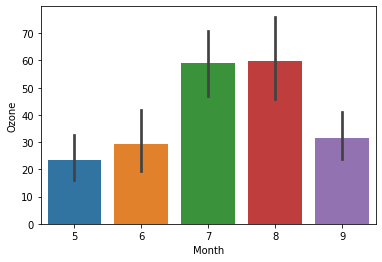

In [ ]:
sns.barplot(x="Month", y="Ozone", data = air)
plt.show()

### 7) heatmap : 두 범주 집계 시각화

① [groupby] stock 데이터를 이용하여 year별, month별 평균 주가(close)를 집계하시오.

In [38]:
temp1 = stock.groupby(['Year','Month'], as_index = False)['Close'].mean()

② [pivot]  'Year','Month', 'Close' 으로 피봇시키시오.

In [39]:
temp2 = temp1.pivot( 'Year','Month', 'Close')
temp2

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.090000,1942.802857,1959.647000,1941.925714
2015,1920.992857,1961.001176,2012.619091,2107.268182,2114.898889,2063.685909,2058.034348,1952.549000,1939.582500,2020.567143,2006.780952,1971.528571
2016,1894.651000,1900.610000,1976.502727,1996.170500,1966.675500,1977.029524,2002.482857,2036.656364,2042.555263,2036.032500,1981.746364,2021.666667
2017,2061.733500,2082.795000,2136.174545,2160.182500,2301.890000,2372.204286,2412.899048,2372.184545,2371.843810,2482.871250,2533.510000,2467.725789
2018,2520.937727,2439.104444,2451.570000,2458.224762,2461.300500,2394.507895,2284.253636,2283.796818,2307.325882,2153.476667,2083.333182,2070.128947
2019,2101.984091,2210.198824,2161.914500,2212.120455,2086.898095,2105.303158,2079.480000,1944.237619,2045.205263,NaN,NaN,NaN


③ heatmap을 그리시오.

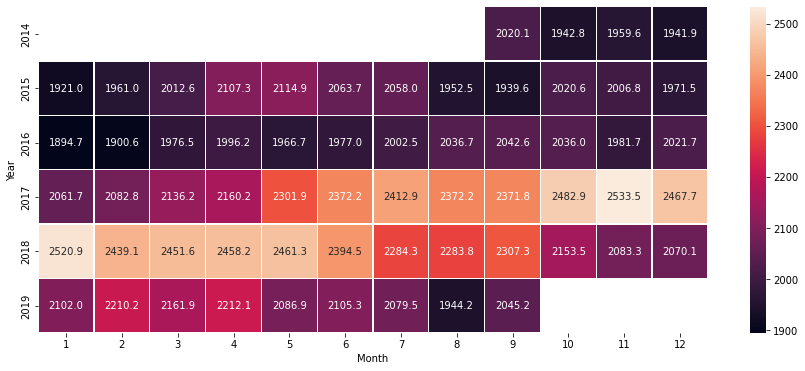

In [43]:
plt.figure(figsize = (15,6))
sns.heatmap(temp2, annot = True, fmt = '.1f', linewidth = .2)
plt.show()